# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

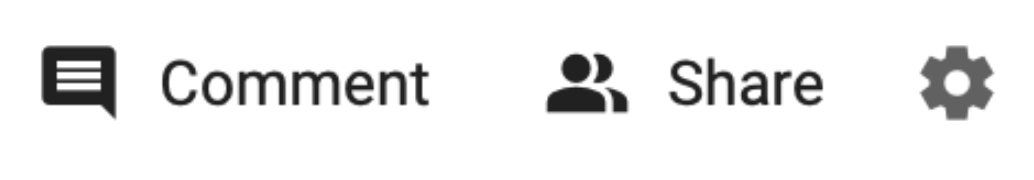

# 📔 **Resolución**
Una vez que la nota sea entregada, encontrarás la resolución en este link de notion:

https://www.notion.so/Soluci-n-Lab-Intro-Reg-Lineal-R-d82ef5829a74487eafe1e37377abd2cd?source=copy_link

Recuerda que existen varias formar de solucionar las actividades propuestas en los laboratorios. Toma la resolución entregada como referencia. En caso de que el link de resolución no esté público, solicita acceso en el mismo link de notion.|

# Dataset

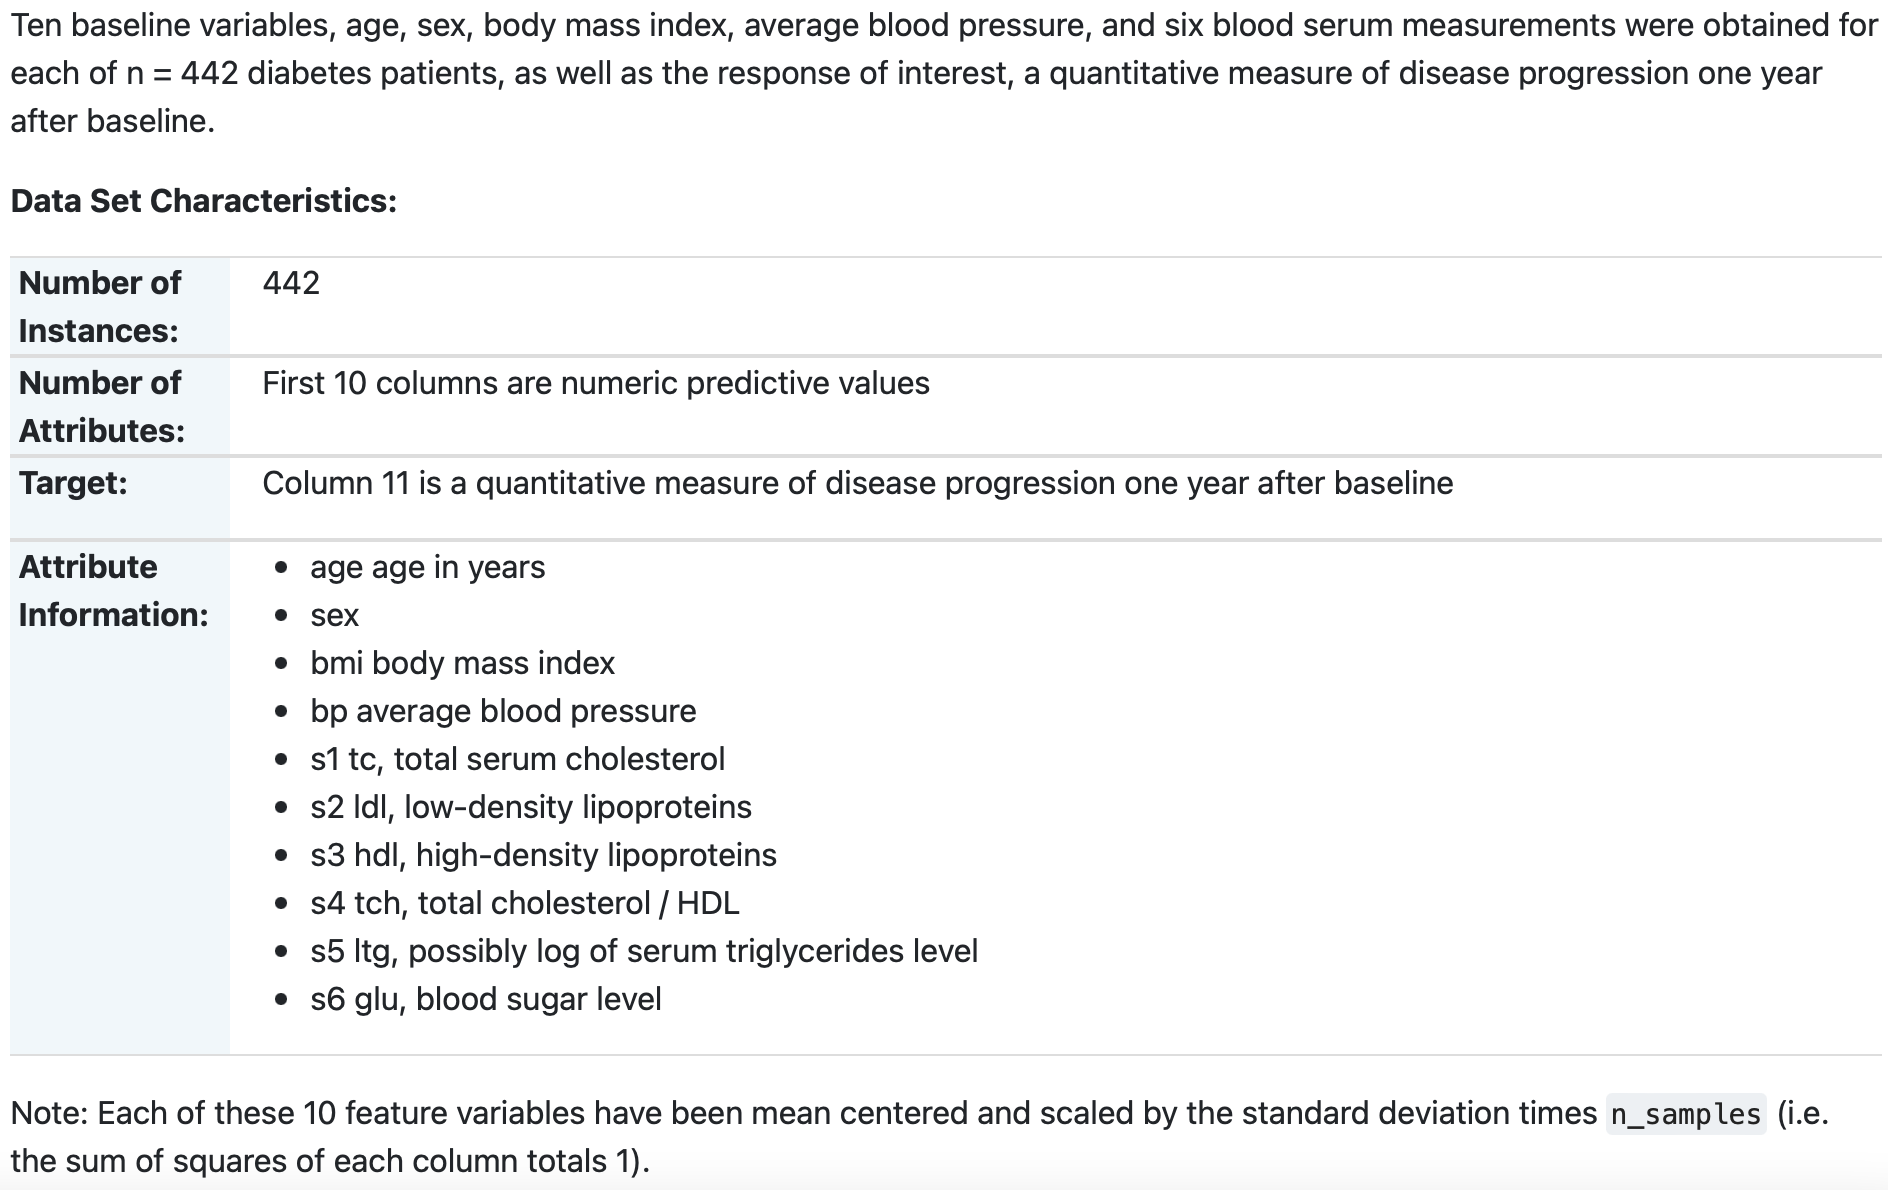

# **Exploratory Data Analysis EDA**

In [ ]:
import matplotlib.pyplot as plt #plots
import numpy as np #matlab de python
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE función de costo
import matplotlib.pyplot as plt #plots
import numpy as np #matlab de python
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE función de costo

# Load the diabetes dataset
diabetes_X_all, diabetes_y = datasets.load_diabetes(return_X_y=True)

#Visualizing the dataset
#import numpy as np
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizing first 10 rows")
print(table)

import pandas as pd
df = pd.DataFrame(complete_table) #just for visualization
df.columns = headers
df
#import numpy as np
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizing first 10 rows")
print(table)

import pandas as pd
df = pd.DataFrame(complete_table) #just for visualization
df.columns = headers
df


Visualizing first 10 rows
╒═════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════╤═════════════╤═════════════╤══════════╕
│         age │        sex │         bmi │          bp │          s1 │          s2 │           s3 │          s4 │          s5 │          s6 │   output │
╞═════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪══════════╡
│  0.0380759  │  0.0506801 │  0.0616962  │  0.0218724  │ -0.0442235  │ -0.0348208  │ -0.0434008   │ -0.00259226 │  0.0199075  │ -0.0176461  │      151 │
├─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┼─────────────┼─────────────┼─────────────┼──────────┤
│ -0.00188202 │ -0.0446416 │ -0.0514741  │ -0.0263275  │ -0.00844872 │ -0.0191633  │  0.0744116   │ -0.0394934  │ -0.0683315  │ -0.092204   │       75 │
├─────────────┼────────────┼─────────────┼─────────────┼

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,output
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


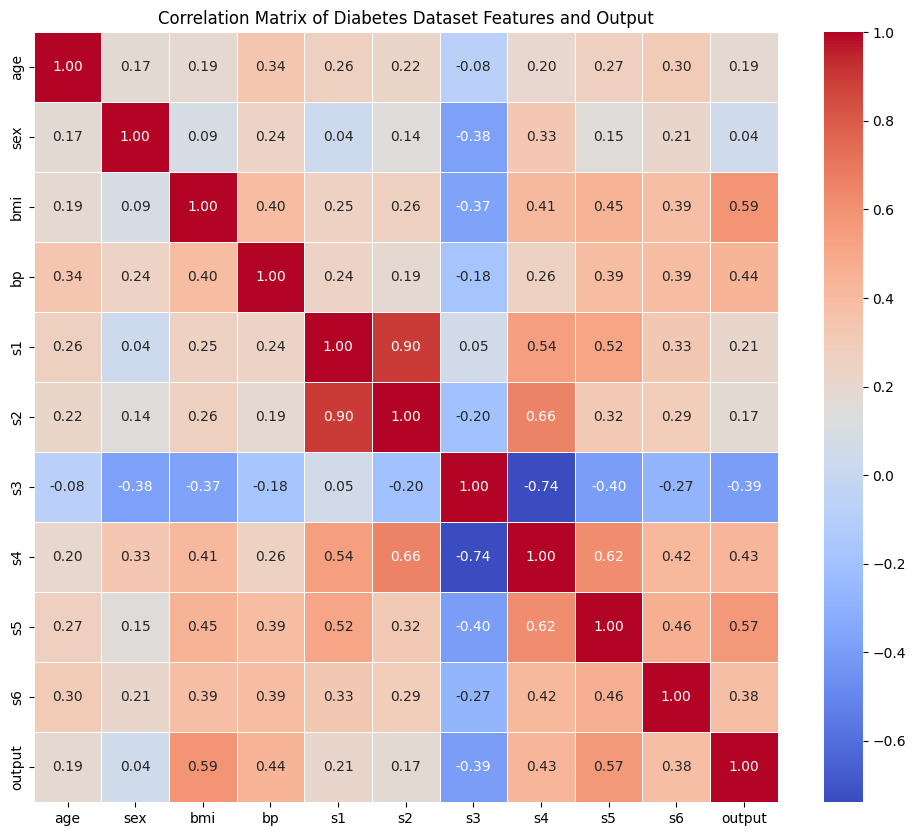

In [ ]:
import seaborn as sns

# Calculate the correlation matrix for the DataFrame df
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Diabetes Dataset Features and Output')
plt.show()

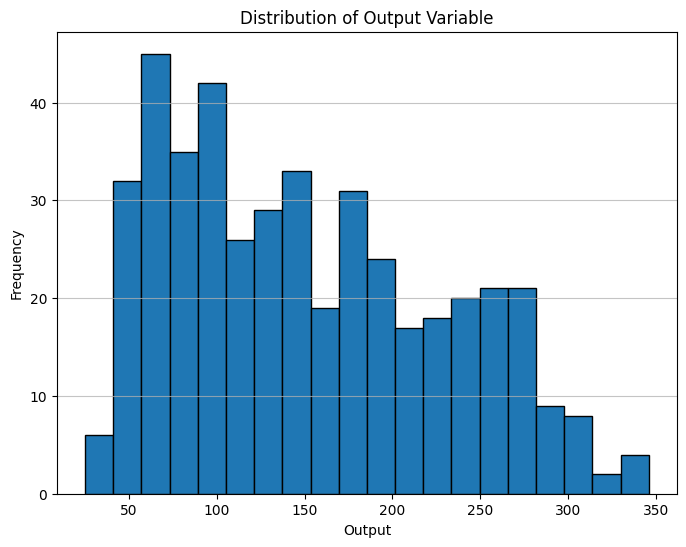

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['output'], bins=20, edgecolor='black')
plt.title('Distribution of Output Variable')
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<Axes: xlabel='bmi', ylabel='output'>

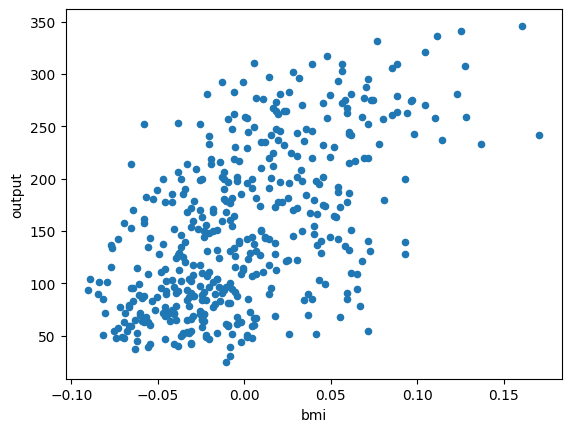

In [ ]:
# prompt: Using dataframe df: bmi vs output

df.plot.scatter(x='bmi', y='output')


# **Machine Learning Model using Pipelines**

# **Pipeline Implementation for Linear Regression**

## Using `Pipeline` in scikit-learn

The code defines a **`Pipeline`**, which is a sequence of data transformers followed by a final estimator. It streamlines the workflow by allowing multiple steps to be chained together into a single object.

### Importing the Pipeline

```python
from sklearn.pipeline import Pipeline
```

This line imports the `Pipeline` class from **scikit-learn**, which is used to define a sequence of processing steps.

---

### Selecting and Reshaping the Feature

```python
diabetes_X = np.reshape(diabetes_X_all[:, 2], (-1, 1))
```

- This example focuses on a **single feature**: **BMI (Body Mass Index)**.
- The BMI feature corresponds to the **3rd column (index 2)** of `diabetes_X_all`.
- `np.reshape` ensures the data is a **column vector**, which is the expected input format for scikit-learn models.

---

### Splitting the Dataset

```python
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
```

- All samples **except the last 20** are used for training.
- The **last 20 samples** are reserved for testing.


---

### Defining the Pipeline

```python
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', linear_model.LinearRegression())
])
```

The pipeline consists of two steps:

1. **Scaler**

   ```python
   ('scaler', StandardScaler())
   ```

   - `StandardScaler` standardizes features by removing the mean and scaling to unit variance.
   - This is good practice, especially for models sensitive to feature scale.

2. **Regressor**

   ```python
   ('regressor', linear_model.LinearRegression())
   ```

   - This is the final estimator.
   - It trains a linear regression model on the scaled data.

---

### Training the Pipeline

```python
model.fit(diabetes_X_train, diabetes_y_train)
```

When `fit` is called on the pipeline:

1. `StandardScaler` learns the **mean and standard deviation** from `diabetes_X_train` and transforms the data.
2. The transformed data is passed to `LinearRegression`, which learns the best-fitting line.

---

### Making Predictions

```python
diabetes_y_pred = model.predict(diabetes_X_test)
```

When `predict` is called:

1. `StandardScaler` transforms `diabetes_X_test` using parameters learned from the training set.
2. The transformed data is passed to the trained `LinearRegression` model to generate predictions.

---

### Output and Plotting

- The code prints:
  - Model coefficients (`θ₁` and `θ₀`)
  - **Mean Squared Error (MSE)**
  - **R-squared score**
- For visualization:
  - `diabetes_X_test_normalized` is obtained by explicitly transforming `diabetes_X_test` using the scaler inside the pipeline.
  - This allows predictions to be plotted correctly against the **scaled input values**.

---

### Why Use a Pipeline?

Using a `Pipeline`:

- Makes the code cleaner and more readable  
- Prevents **data leakage** (scaling is learned only from training data)  
- Ensures consistent preprocessing during training and testing  
- Makes it easy to add new preprocessing steps or swap models later  


Coefficients: 
 theta_1 =  [44.64921599]  theta_0  =  153.36255924170615
Mean squared error (MSE Cost): 2548.07
Coefficient of determination: 0.47


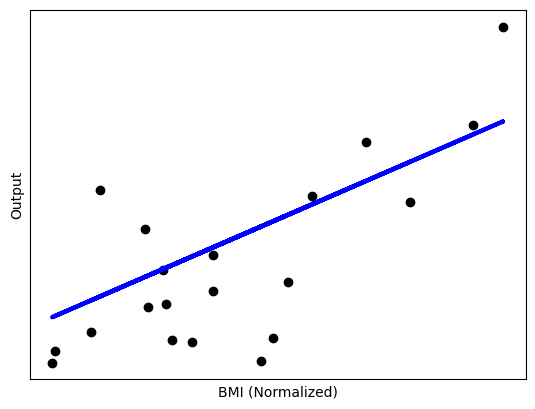

In [ ]:
from sklearn.pipeline import Pipeline

# Use only one feature, feature 2. bmi
diabetes_X = np.reshape(diabetes_X_all[:, 2], (-1, 1)) #column vector

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:] #last 20 for test

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create a pipeline with StandardScaler and LinearRegression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', linear_model.LinearRegression())
])

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients theta_0 (inter.), theta_1 (pendiente)
print("Coefficients: \n", "theta_1 = ", model.named_steps['regressor'].coef_, " theta_0  = ", model.named_steps['regressor'].intercept_)
# The mean squared error
print("Mean squared error (MSE Cost): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction, varía entre 0 y 1
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
# We need the scaled test data for plotting
diabetes_X_test_normalized = model.named_steps['scaler'].transform(diabetes_X_test)
plt.scatter(diabetes_X_test_normalized, diabetes_y_test, color="black")
plt.plot(diabetes_X_test_normalized, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel('BMI (Normalized)')
plt.ylabel('Output')
plt.xticks(())
plt.yticks(())

plt.show()



# ✅ **Actividad 1: Implementación de un Regresor Lineal Multivariable**

Utilizando la base de datos del punto anterior, implementa un regresor lineal multivariable utilizando todas las características disponibles. Sigue los pasos a continuación:

1. **Entrenamiento del Modelo**:
   - Usa todas las características de la base de datos para entrenar el modelo.
   - Emplea el mismo conjunto de entrenamiento y test que utilizaste en el punto anterior.

2. **Evaluación del Modelo**:
   - Calcula el error cuadrático medio (MSE) en el conjunto de test.
   - Calcula el coeficiente de determinación (score R²) en el conjunto de test.

3. **Análisis de Resultados**:
   - Compara el valor del R² obtenido con el del punto anterior. ¿Ha mejorado el valor de R²? Explica por qué podría haber ocurrido esta mejora o deterioro.
   - Determina cuál es la característica más importante para predecir la salida. Para ello, observa los valores de los coeficientes (`theta`) del modelo y analiza su impacto en la predicción.

**Tip:** Recuerda que los valores de los coeficientes (`theta`) indican la importancia de cada característica en la predicción. Características con valores de `theta` más altos en magnitud pueden tener un mayor impacto en el resultado.



In [ ]:
# código

Aquí las observaciones solicitadas



#**✅ Actividad 2: Uso de SGDRegressor con Mini-batch Gradient Descent**

Repite la Actividad 1 utilizando la función `partial_fit` del modelo [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.partial_fit) de Scikit-learn. Implementa el entrenamiento mediante mini-batch Gradient Descent con el método `.partial_fit`. Recuerda que el `scaler` también necesita ser ajustado utilizando `partial_fit`.

**Objetivos:**

1. Entrenar el modelo **sin regularización** con dos valores distintos de la tasa de aprendizaje (learning rate):
   - Caso 1: Learning rate = 0.001
   - Caso 2: Learning rate = 0.1

2. Grafica la función de pérdida (Loss) en función de las iteraciones (Iterations or steps) para ambos casos.

3. Comenta tus observaciones sobre los resultados obtenidos.

**Tip:** Puedes consultar este [enlace](https://stackoverflow.com/questions/63660682/batch-size-and-number-of-epochs-in-partial-fit-in-sklearn-sgdregressor) para más información sobre cómo ajustar el tamaño de batch y el número de épocas en `partial_fit`.


In [ ]:
#aquí tu código